In [25]:
import pandas as pd
import math
import statistics
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

### Population Statistics:


<font size="3">The resident population size was 59,597,300 (56,489,800 in England and 3,107,500 in Wales)</font>

<font size="3">The population of England and Wales grew by more than 3.5 million (6.3%) since the last census in 2011, when it was 56,075,912.</font>

<font size="3">There were 30,420,100 women (51.0% of the overall population) and 29,177,200 men (49.0%) in England and Wales.</font>

<font size="3">There were more people than ever before in the older age groups; the proportion of the population who were aged 65 years and over was 18.6% (16.4% in 2011).</font>

In [26]:
data = pd.read_csv('anonymised_data.csv')
data = pd.DataFrame(data)
data.head()

,DOB,operation date,Date of death,Gender,Pe-op Euroqol exam_date,Euroqol mobility,Euroqol self care,Euroqol activities,Euroqol pain,Euroqol anxiety,...,Post-op EQ5d 6m - 2yrs,6m-2yr mobility,6m-2yr self_care,6m-2yr activities,6m-2yr pain,6m-2yr anxiety,6m-2yr self_score,Unnamed: 77,Complications,Unnamed: 79
0,10/12/1954,19/06/2003,- -,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
1,10/09/1932,02/05/2008,- -,M,23/04/2008,02=I have some problems in walking about,02=I have some problems washing and dressing m...,02=I have some problems with performing my usu...,02=I have moderate pain or discomfort,01=I am not anxious or depressed,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
2,07/05/1929,24/10/2000,25/02/2015,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,30/10/2000: [(_C) Non Hip related] 19=Cardiova...,NaN
3,28/01/1955,22/04/2010,- -,F,21/04/2010,02=I have some problems in walking about,01=I have no problems with self-care,02=I have some problems with performing my usu...,03=I have extreme pain or discomfort,01=I am not anxious or depressed,...,0.69,1.0,1.0,2.0,2.0,1.0,60.0,NaN,NaN,NaN
4,11/04/1930,22/03/2012,- -,F,14/03/2012,02=I have some problems in walking about,02=I have some problems washing and dressing m...,03=I am unable to perform my usual activities,02=I have moderate pain or discomfort,02=I am moderately anxious or depressed,...,0.59,2.0,1.0,2.0,2.0,2.0,70.0,NaN,NaN,NaN


In [27]:
df1 = data[['DOB', 'Date of death', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
#df1.head()
df1

,DOB,Date of death,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,10/12/1954,- -,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0
1,10/09/1932,- -,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0
2,07/05/1929,25/02/2015,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0
3,28/01/1955,- -,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0
4,11/04/1930,- -,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,18/04/1937,- -,M,2,4,4,3,4,3,4,4,1,4,2,1,36.0
2354,01/03/1938,- -,F,1,4,3,3,3,2,3,3,3,2,3,2,32.0
2355,29/06/1968,- -,M,1,2,2,1,2,3,2,1,0,0,1,0,15.0
2356,05/09/1940,- -,M,0,4,2,2,4,4,3,0,4,0,2,0,25.0


In [28]:
df1['dob'] = pd.to_datetime(df1['DOB'], errors='coerce')
now = pd.to_datetime('now')
df1['Age'] = (now - df1['dob']).astype('<m8[Y]')

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_5639/3495347002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dob'] = pd.to_datetime(df1['DOB'], errors='coerce')
/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_5639/3495347002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = (now - df1['dob']).astype('<m8[Y]')


In [29]:
df1 = df1[['DOB', 'Date of death', 'Age','Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df1

,DOB,Date of death,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,10/12/1954,- -,67.0,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0
1,10/09/1932,- -,89.0,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0
2,07/05/1929,25/02/2015,93.0,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0
3,28/01/1955,- -,67.0,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0
4,11/04/1930,- -,91.0,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,18/04/1937,- -,85.0,M,2,4,4,3,4,3,4,4,1,4,2,1,36.0
2354,01/03/1938,- -,84.0,F,1,4,3,3,3,2,3,3,3,2,3,2,32.0
2355,29/06/1968,- -,54.0,M,1,2,2,1,2,3,2,1,0,0,1,0,15.0
2356,05/09/1940,- -,82.0,M,0,4,2,2,4,4,3,0,4,0,2,0,25.0


In [30]:
df2 = pd.DataFrame(columns = ['DOB', 'Date of death', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS'], index=range(8000))
df2

,DOB,Date of death,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def random_datetimes_or_dates(start, end, out_format='datetime', n=8000): 


    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit) 

In [32]:
start = pd.to_datetime('1909-01-01')
end = pd.to_datetime('2012-12-31')
random_datetimes_or_dates(start, end, out_format='not datetime')
dates = random_datetimes_or_dates(start, end, out_format='not datetime')

In [33]:
df2['DOB'] = pd.DataFrame(dates)

In [34]:
gender_series = df2.Gender.apply(lambda x: random.choice(['M', 'F'])) 
df2['Gender'] = gender_series

In [35]:
import numpy as np
seed = 8000
X1 = np.random.randint(low=0, high=5, size=(8000)) # Put a seed in
X2 = np.random.randint(low=0, high=5, size=(8000))
X3 = np.random.randint(low=0, high=5, size=(8000))
X4 = np.random.randint(low=0, high=5, size=(8000))
X5 = np.random.randint(low=0, high=5, size=(8000))
X6 = np.random.randint(low=0, high=5, size=(8000))
X7 = np.random.randint(low=0, high=5, size=(8000))
X8 = np.random.randint(low=0, high=5, size=(8000))
X9 = np.random.randint(low=0, high=5, size=(8000))
X10 = np.random.randint(low=0, high=5, size=(8000))
X11 = np.random.randint(low=0, high=5, size=(8000))
X12= np.random.randint(low=0, high=5, size=(8000))

In [36]:
df2['OHS 1 pre-op Pain'] = X1
df2['OHS 2 pre-op washing'] = X2
df2['OHS 3 pre-op pub transport'] = X3
df2['OHS 4 pre-op Socks'] = X4
df2['OHS 5 pre-op Shopping'] = X5
df2['OHS 6 pre-op Walking'] = X6
df2['OHS 7 pre-op Stairs'] = X7
df2['OHS 8 pre-op Chair'] = X8
df2['OHS 9 pre-op Limp'] = X9
df2['OHS 10 pre-op Severe pain'] = X10
df2['OHS 11 pre-op Work'] = X11
df2['OHS 12 pre-op night pain'] = X12

In [37]:
df2['new pre op OHS']=df2.iloc[:,3:15].sum(axis=1)

In [38]:
df2['dob'] = pd.to_datetime(df2['DOB'], errors='coerce')
now = pd.to_datetime('now')
df2['Age'] = (now - df2['dob']).astype('<m8[Y]') 

In [39]:
df2 = df2[['DOB' ,'Age', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df2

,DOB,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,1940-11-16,81.0,F,2,2,4,3,4,1,1,3,3,3,3,2,31
1,1967-08-22,54.0,M,3,4,2,2,3,0,1,4,1,3,2,4,29
2,1969-04-04,53.0,F,2,0,1,1,4,0,2,0,0,0,1,4,15
3,1929-04-03,93.0,F,4,0,1,4,3,0,2,2,1,3,4,3,27
4,1965-10-03,56.0,F,2,3,0,2,2,4,4,2,4,4,2,4,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1972-12-23,49.0,F,1,3,1,4,3,0,3,2,1,0,4,0,22
7996,1946-02-03,76.0,F,4,4,2,2,2,0,1,3,4,2,4,0,28
7997,2010-12-31,11.0,F,2,1,0,3,0,0,0,0,1,4,1,4,16
7998,1967-10-24,54.0,F,1,1,2,0,4,3,0,0,1,0,4,4,20


In [40]:
df = pd.merge(df1, df2, on=['Age'],how='inner', indicator='Exist')
df

,DOB_x,Date of death,Age,Gender_x,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,...,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,new pre op OHS_y,Exist
0,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,1,2,0,0,1,4,4,2,23,both
1,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,2,0,2,3,1,4,0,2,18,both
2,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,2,1,2,2,3,2,3,1,22,both
3,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,1,2,4,1,2,4,3,3,26,both
4,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,0,3,1,4,2,4,0,1,24,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181607,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,1,1,4,1,3,0,1,0,13,both
181608,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,4,0,3,3,3,0,2,3,23,both
181609,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,2,1,0,4,3,0,2,2,16,both
181610,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,2,0,0,0,4,4,4,0,18,both


In [41]:
df['Exist'] = np.where(df.Exist == 'both' , 1, 0)
df = pd.DataFrame(df)
df

,DOB_x,Date of death,Age,Gender_x,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,...,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,new pre op OHS_y,Exist
0,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,1,2,0,0,1,4,4,2,23,1
1,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,2,0,2,3,1,4,0,2,18,1
2,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,2,1,2,2,3,2,3,1,22,1
3,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,1,2,4,1,2,4,3,3,26,1
4,10/12/1954,- -,67.0,F,1,1,2,1,2,3,...,0,3,1,4,2,4,0,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181607,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,1,1,4,1,3,0,1,0,13,1
181608,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,4,0,3,3,3,0,2,3,23,1
181609,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,2,1,0,4,3,0,2,2,16,1
181610,17/07/1983,- -,38.0,F,1,2,1,0,0,1,...,2,0,0,0,4,4,4,0,18,1


In [42]:
df['Gender'] = df['Gender_y']
df['new pre op OHS'] = df['new pre op OHS_y']
df['OHS 1 pre-op Pain'] = df['OHS 1 pre-op Pain_y']
df['OHS 2 pre-op washing'] = df['OHS 2 pre-op washing_y']
df['OHS 3 pre-op pub transport'] = df['OHS 3 pre-op pub transport_y']
df['OHS 4 pre-op Socks'] = df['OHS 4 pre-op Socks_y']
df['OHS 5 pre-op Shopping'] = df['OHS 5 pre-op Shopping_y']
df['OHS 6 pre-op Walking'] = df['OHS 6 pre-op Walking_y']
df['OHS 7 pre-op Stairs'] = df['OHS 7 pre-op Stairs_y']
df['OHS 8 pre-op Chair'] = df['OHS 8 pre-op Chair_y']
df['OHS 9 pre-op Limp'] = df['OHS 9 pre-op Limp_y']
df['OHS 10 pre-op Severe pain'] = df['OHS 10 pre-op Severe pain_y']
df['OHS 11 pre-op Work'] = df['OHS 11 pre-op Work_y']
df['OHS 12 pre-op night pain'] = df['OHS 12 pre-op night pain_y']

In [43]:
df = df[['Age', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,67.0,M,0,3,3,3,1,2,0,0,1,4,4,2,23
1,67.0,M,2,1,1,0,2,0,2,3,1,4,0,2,18
2,67.0,M,0,3,0,3,2,1,2,2,3,2,3,1,22
3,67.0,F,4,0,1,1,1,2,4,1,2,4,3,3,26
4,67.0,F,4,0,1,4,0,3,1,4,2,4,0,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181607,38.0,F,0,1,0,1,1,1,4,1,3,0,1,0,13
181608,38.0,M,1,4,0,0,4,0,3,3,3,0,2,3,23
181609,38.0,M,1,0,1,0,2,1,0,4,3,0,2,2,16
181610,38.0,F,2,0,2,0,2,0,0,0,4,4,4,0,18


In [ ]:
# Use the threshold of 20 for this dataset?
# Use a lower threshold of 16 maybe?
# Compare the mean improvement in OHS - or use a regression to predict the post op OHS

In [50]:
df['new pre op OHS'].unique()

array([23, 18, 22, 26, 24, 14, 21, 15, 25, 33, 17, 31, 20, 19, 16, 30, 28,
       32,  7, 27, 12, 37, 13, 34, 35, 39, 29,  9, 36, 11, 38, 40, 10,  8])

#### Distribution of age from original sample data

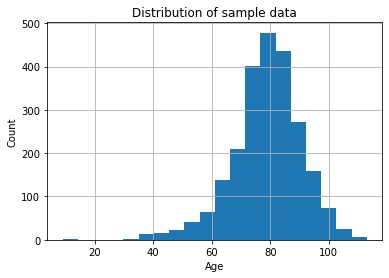

In [44]:
df1['Age'].hist(bins = 20)
plt.title('Distribution of sample data')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Distribution of age from generated data

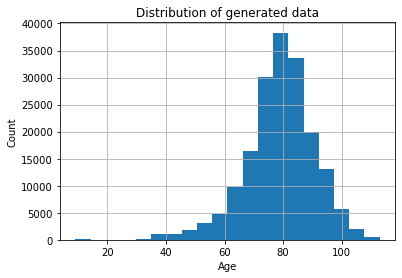

In [45]:
df['Age'].hist(bins=20)
plt.title('Distribution of generated data')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The two distributions are identical, the only difference is that there is a lot more data for the generated dataframe suggesting that this data is viable.

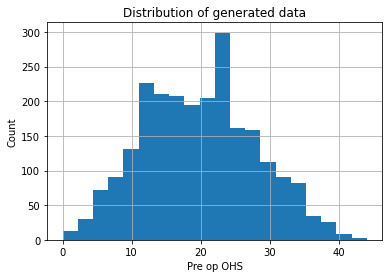

In [46]:
df1['new pre op OHS'].hist(bins=20)
plt.title('Distribution of generated data')
plt.xlabel('Pre op OHS')
plt.ylabel('Count')
plt.show()

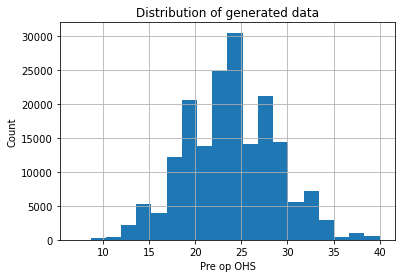

In [47]:
df['new pre op OHS'].hist(bins=20)
plt.title('Distribution of generated data')
plt.xlabel('Pre op OHS')
plt.ylabel('Count')
plt.show()

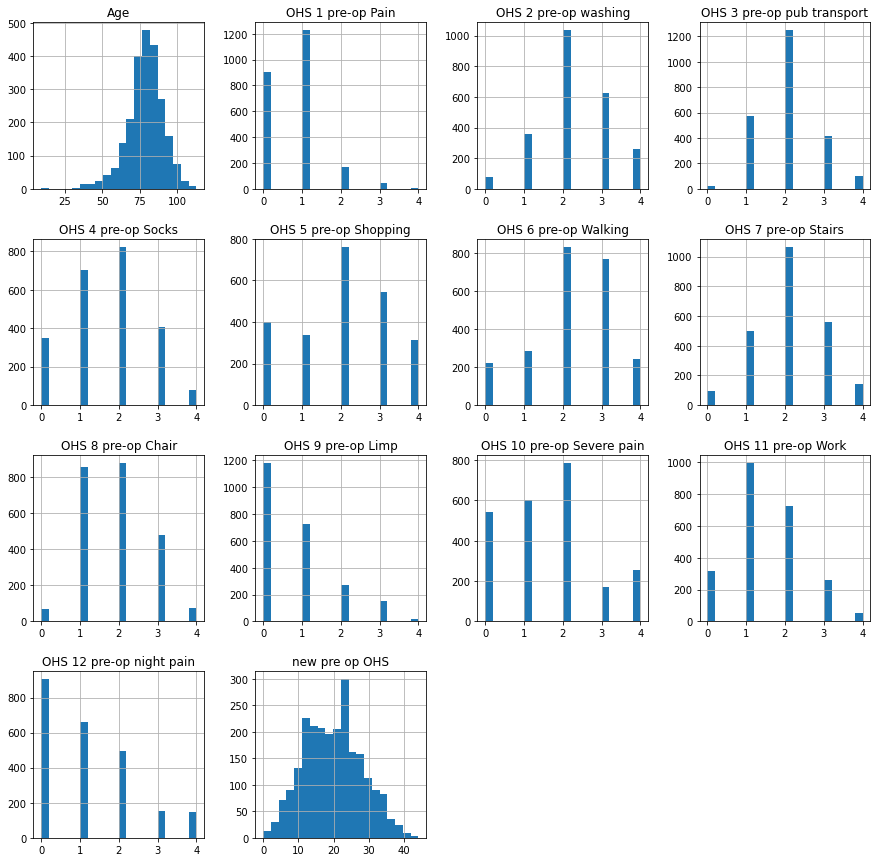

In [48]:
df1.hist(bins=20, figsize = (15,15))
plt.show();

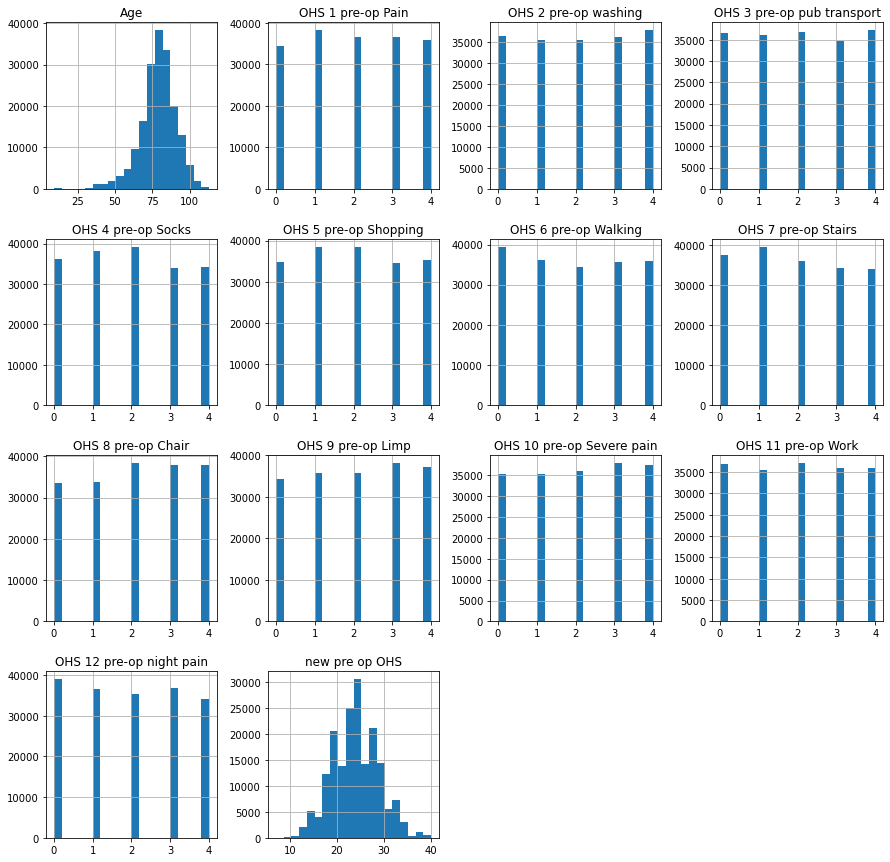

In [49]:
df.hist(bins=20, figsize = (15,15))
plt.show();